In [59]:
import pandas as pd
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import pickle

from utils import preprocess
from models import Poisson_Model
%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def get_stats(m, data_dict):
    pred = m.predict_y(data_dict['X_test'])
    data_dict['test']['pred'] = pred[0]
    MSE = (np.square(pred[0] - data_dict['y_test']) / len(pred))
    return data_dict, MSE



In [95]:
data = pd.read_csv('../data/gp_weekly_grid_parkslope.csv')
data['DATETIME'] = pd.to_datetime(data['DATETIME'])




data_dict = preprocess(data, start_date= '2017/01/01', training_end_date= 26, \
                                                       testing_end_date=12)

e_s = (39.270244500000004 / data.GRID_SQUARE.max())

Training ends on: 2017-07-02 00:00:00
testing ends on: 2017-09-24 00:00:00


In [44]:

m = Poisson_Model(data_dict['X_train'],data_dict['y_train'],use_priors=True, e_s= e_s, period = 52)
m.compile()
opt = gpflow.train.ScipyOptimizer()
print(m.compute_log_likelihood())
opt.minimize(m, maxiter = 1000)


,class,prior,transform,trainable,shape,fixed_shape,value
VGP/q_sqrt,Parameter,None,LoTri->vec,True,"(1, 2544, 2544)",True,"[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
VGP/q_mu,Parameter,None,(none),True,"(2544, 1)",True,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
VGP/kern/periodic/period,Parameter,None,+ve,True,(),True,52.0
VGP/kern/periodic/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/periodic/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_1/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_1/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_2/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_2/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_2/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0


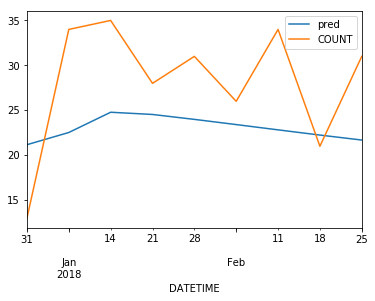

In [54]:
test.groupby(level = [0]).sum()[['pred','COUNT']].plot()

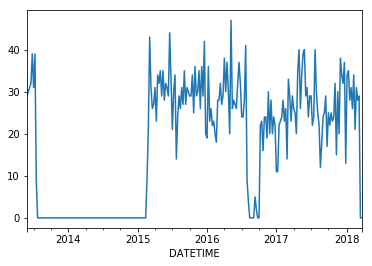

In [55]:
data.groupby('DATETIME')['COUNT'].sum().plot()

In [ ]:
pred[1].shape

In [ ]:
plotter = pd.DataFrame()

plotter['pred'] = np.reshape(pred[0], (len(pred[0],)))
plotter['y_test'] = y_test

In [ ]:
plotter.plot()